# Decision Tree & Random Forest
NIM: 2041720132
<br>
Nama: Maulana Bintang Irfansyah
<br>
Kelas: TI-3H

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data_mushrooms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 10/mushrooms.csv')
data_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [116]:
data_mushrooms.shape

(8124, 23)

In [117]:
data_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [118]:
data_mushrooms.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [119]:
data_mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [120]:
columns=data_mushrooms.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [121]:
data_mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [122]:
(data_mushrooms['class'].value_counts())/len(data_mushrooms['class'])*100

e    51.797144
p    48.202856
Name: class, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


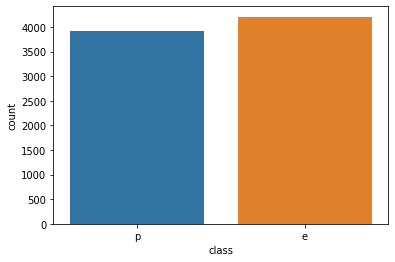

In [123]:
sns.countplot(data_mushrooms['class'])

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_mushrooms = data_mushrooms.apply(LabelEncoder().fit_transform)   
data_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [125]:
x = data_mushrooms.drop(['class'] , axis = 1)
y = data_mushrooms['class']

In [126]:
x = data_mushrooms.drop(['class'] , axis = 1)
y = data_mushrooms['class']

In [127]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)


**Decision Tree Model**

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [129]:
dt.score(x_train , y_train)

0.9778403095321843

In [130]:
predictions = dt.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9827727645611156

**Random Forest Model**

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [133]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9899753781217024

In [134]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9905660377358491

In [135]:
accuracy_score(y_test , predictions)

0.9905660377358491

1. Decision Tree Accuracy - 98.2%
2. Random Forest Accuracy - 99%
Jadi, Random Forest relatif lebih baik.

**Penambahan untuk Adaboots**

In [136]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
ad.fit(x_train, y_train)

# Memprediksi label set test
y_pred_ad = ad.predict(x_test)

#  menghitung set accuracy
acc_ad = accuracy_score(y_test, y_pred_ad)
print("Test set accuracy: {:.2f}".format(acc_ad))
print(f"Test set accuracy: {acc_ad}")

Test set accuracy: 0.97
Test set accuracy: 0.9700574241181296


**Penambahan untuk Random Forest**



In [137]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(x_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(x_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


In [138]:
# Pada kasus ini menggunakan seluruh parameter default dari RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(x_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(x_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


In [139]:
model=RandomForestClassifier(n_jobs=-1)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
parameters={'max_depth':[3,5,7,10,None],
           'n_estimators':[100,200,300,400,500],
           'max_features':randint(1,13),
           'criterion':['gini','entropy'],
           'bootstrap':[True,False],
           'min_samples_leaf':randint(1,5)}

In [141]:
def hyperparameter_tuning(model,parameters,n_of_itern,X_train,y_train):
    random_search=RandomizedSearchCV(estimator=model,
                                    param_distributions=parameters,
                                    n_jobs=-1,
                                     n_iter=n_of_itern,
                                     cv=9)
    random_search.fit(X_train,y_train)
    params=random_search.best_params_
    score=random_search.best_score_
    return params,score

In [142]:
final_params,final_score=hyperparameter_tuning(model,parameters,40,x_train,y_train)

In [147]:
final_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [148]:
final_score

1.0

In [149]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                            max_depth=None,
                            max_features=8,
                            min_samples_leaf=2,
                            n_estimators=200)
                                               
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

print('Model accuracy is : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy is : 1.0000


**Penambahan untuk Jobsheet 3** 
<br>
Stacking 


In [150]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())


clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
clf.fit(x_train, y_train).score(x_test, y_test)

1.0

In [151]:

clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn_1', KNeighborsClassifier())],
                   final_estimator=StackingClassifier(estimators=[('dt_2',
                                                                   DecisionTreeClassifier()),
                                                                  ('rf_2',
                                                                   RandomForestClassifier(n_estimators=50,
                                                                                          random_state=42))],
                                                      final_estimator=LogisticRegression()))

In [153]:
predictions = clf.predict(x_test)
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1052\n           1       1.00      1.00      1.00       979\n\n    accuracy                           1.00      2031\n   macro avg       1.00      1.00      1.00      2031\nweighted avg       1.00      1.00      1.00      2031\n'